In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix

2023-04-21 12:45:45.485545: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert labels to one-hot vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Set the class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 54s 0us/step


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [6]:
history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15
782/782 [==============================] - 129s 164ms/step - loss: 1.5558 - accuracy: 0.4318 - val_loss: 1.2136 - val_accuracy: 0.5665
Epoch 2/15
782/782 [==============================] - 148s 189ms/step - loss: 1.2198 - accuracy: 0.5668 - val_loss: 1.0106 - val_accuracy: 0.6400
Epoch 3/15
782/782 [==============================] - 143s 182ms/step - loss: 1.0449 - accuracy: 0.6345 - val_loss: 0.9171 - val_accuracy: 0.6778
Epoch 4/15
782/782 [==============================] - 123s 157ms/step - loss: 0.9321 - accuracy: 0.6729 - val_loss: 0.8458 - val_accuracy: 0.7072
Epoch 5/15
782/782 [==============================] - 136s 174ms/step - loss: 0.8585 - accuracy: 0.7018 - val_loss: 0.8019 - val_accuracy: 0.7206
Epoch 6/15
782/782 [==============================] - 145s 185ms/step - loss: 0.7915 - accuracy: 0.7212 - val_loss: 0.7562 - val_accuracy: 0.7374
Epoch 7/15
782/782 [==============================] - 99s 126ms/step - loss: 0.7275 - accuracy: 0.7453 - val_loss: 0.7486 - 

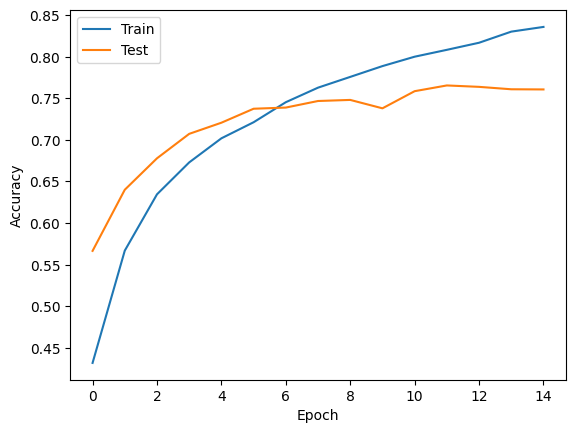

In [7]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("CNN Accuracy:", accuracy)

confusion_mtx = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:\n", confusion_mtx)

313/313 [==============================] - 16s 49ms/step
CNN Accuracy: 0.7606
Confusion Matrix:
 [[828  16  40  21   8   4   2   8  46  27]
 [ 11 848   3   2   3   5   0   1  11 116]
 [ 60   3 679  43  69  64  38  25   6  13]
 [ 20   9  61 589  62 160  30  38   7  24]
 [ 23   2  49  70 721  28  27  68   7   5]
 [ 10   2  38 165  35 665  13  52   7  13]
 [  7   4  49  93  44  25 745   5  14  14]
 [ 19   0  36  33  44  47   4 799   2  16]
 [ 60  25  15  14   6   2   1   2 854  21]
 [ 31  45   5   7   0   4   3  12  15 878]]


In [9]:
def test_cnn_accuracy():
    assert accuracy > 0.6, "CNN accuracy too low"
    
test_cnn_accuracy()